In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# roberta-large results

In [2]:
input_lens = [0, 50, 100, 150, 250]
accuracies = [43.98, 49.50, 51.76, 59.55, 65.00]
stds = [11.41, 5.21, 5.69, 5.82, 9.72]
n_samples = [1065, 337, 165, 89, 24]

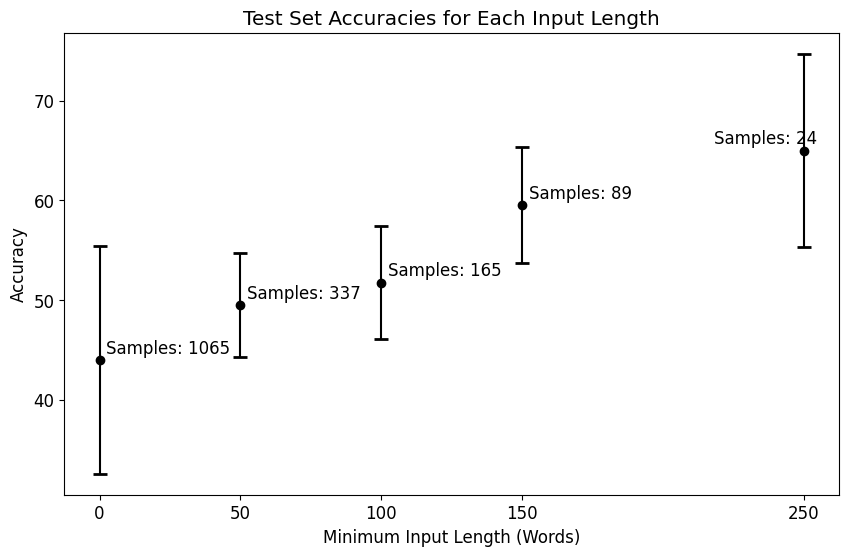

In [8]:
import matplotlib.pyplot as plt

# Data
input_lens = [0, 50, 100, 150, 250]
accuracies = [43.98, 49.5, 51.76, 59.55, 65.0]
stds = [11.41, 5.21, 5.69, 5.82, 9.72]
n_samples = [1065, 337, 165, 89, 24]

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(input_lens, accuracies, yerr=stds, fmt='o', capsize=5, capthick=2, ecolor='black', color='black', label='Accuracy')
for i, acc in enumerate(accuracies):
    if i == len(accuracies) - 1:  # If this is the last point
        plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(-65, 5), textcoords='offset points')
    else:
        plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(5, 5), textcoords='offset points')

# Axes labels
plt.xlabel('Minimum Input Length (Words)')
plt.ylabel('Accuracy')

plt.xticks(input_lens)

# Title
plt.title('Test Set Accuracies for Each Input Length')

# Save and show plot
plt.savefig('../TeX/figures/roberta-large_acc_for_min_len.png')
plt.show()

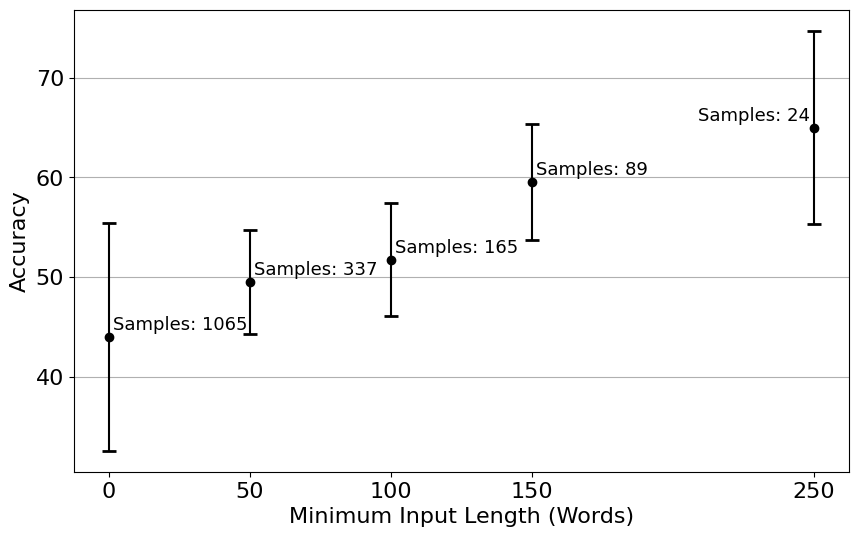

In [1]:
import matplotlib.pyplot as plt

# Set font size
plt.rcParams.update({'font.size': 16})

# Data
input_lens = [0, 50, 100, 150, 250]
accuracies = [43.98, 49.5, 51.76, 59.55, 65.0]
stds = [11.41, 5.21, 5.69, 5.82, 9.72]
n_samples = [1065, 337, 165, 89, 24]

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(input_lens, accuracies, yerr=stds, fmt='o', capsize=5, capthick=2, ecolor='black', color='black', label='Accuracy')
for i, acc in enumerate(accuracies):
    if i == len(accuracies) - 1:  # If this is the last point
        plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(-83, 5), textcoords='offset points', fontsize=13, ha='left')
    else:
        plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(3, 5), textcoords='offset points', fontsize=13)

# Axes labels
plt.xlabel('Minimum Input Length (Words)')
plt.ylabel('Accuracy')

plt.xticks(input_lens)
plt.grid(axis='y')
# Title
# plt.title('Test Set Accuracies for Each Input Length')

# Save and show plot
plt.savefig('../TeX/figures/updates/roberta-large_acc_for_min_len.png', bbox_inches='tight')
plt.show()

# Descriptives

In [2]:
from utils.preprocessing.transcript import load_data_with_labels, combine_turns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Paths
pacs_labels_path = r"E:\PACS\Data\PACS_labels_updated.xlsx"
all_docs_path = r"E:\PACS\Data\PACS_docx"

train_path = r"E:\PACS\Data\train_PACS.csv"
val_path = r"E:\PACS\Data\val_PACS.csv"
test_path = r"E:\PACS\Data\test_PACS.csv"

# Load data
full = load_data_with_labels(pacs_labels_path, all_docs_path)

train = pd.read_csv(train_path, sep="\t")
val = pd.read_csv(val_path, sep="\t")
test = pd.read_csv(test_path, sep="\t")

# Turn lengths
full["turn_length"] = full["text"].apply(lambda x: len(x.split()))
avg_turn_length = np.mean(full["turn_length"])

train["turn_length"] = train["text"].apply(lambda x: len(x.split()))
train_avg_turn_length = np.mean(train["turn_length"])

val["turn_length"] = val["text"].apply(lambda x: len(x.split()))
val_avg_turn_length = np.mean(val["turn_length"])

test["turn_length"] = test["text"].apply(lambda x: len(x.split()))
test_avg_turn_length = np.mean(test["turn_length"])


Loaded 78 documents.


In [3]:
train.shape[0], val.shape[0], test.shape[0]

(5343, 847, 1065)

In [4]:
train_val = pd.concat([train, val])
train_val_original_docs = train_val.drop_duplicates(subset=["document"]).drop(["text", "turn_length"], axis=1)

In [5]:
train_val_original_docs["label"].value_counts(normalize=True)

label
3    0.430769
2    0.307692
1    0.261538
Name: proportion, dtype: float64

In [6]:
train_val_combined = combine_turns(train_val, 150)

In [7]:
train_val_combined["label"].value_counts(normalize=True)

label
3    0.496894
2    0.308489
1    0.194617
Name: proportion, dtype: float64

In [8]:
full.rename(columns={"label": "Label"}, inplace=True)

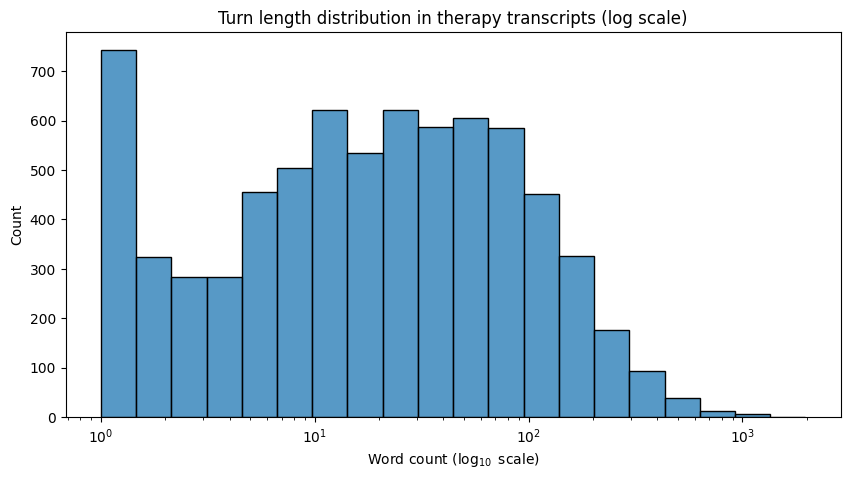

In [47]:
# Plot turn length distributions
plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(full["turn_length"], bins=20, label="Full PACS data set")
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.title("Turn length distribution in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/log_turn_length_dist_full.png")
plt.show()

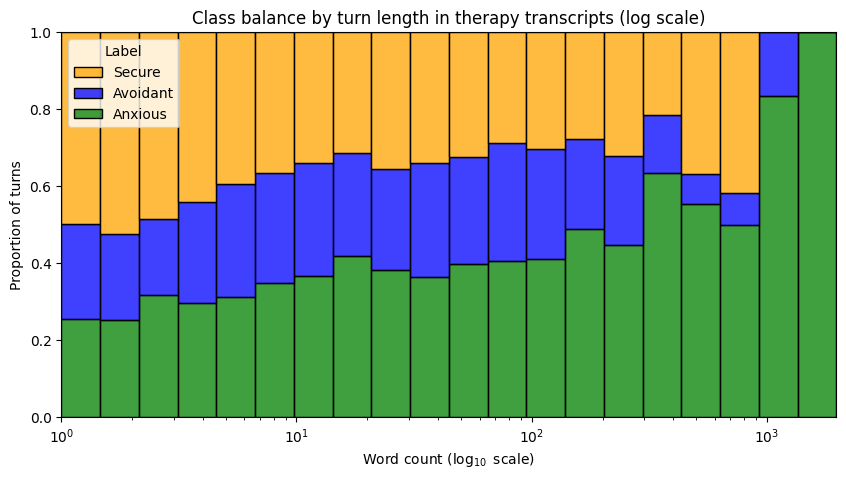

In [69]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Anxious"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)

# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Anxious": 'green'}

plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="fill", legend=True)
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.ylabel("Proportion of turns")
plt.title("Class balance by turn length in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/class_balance_by_log_turn_length.png")
plt.show()

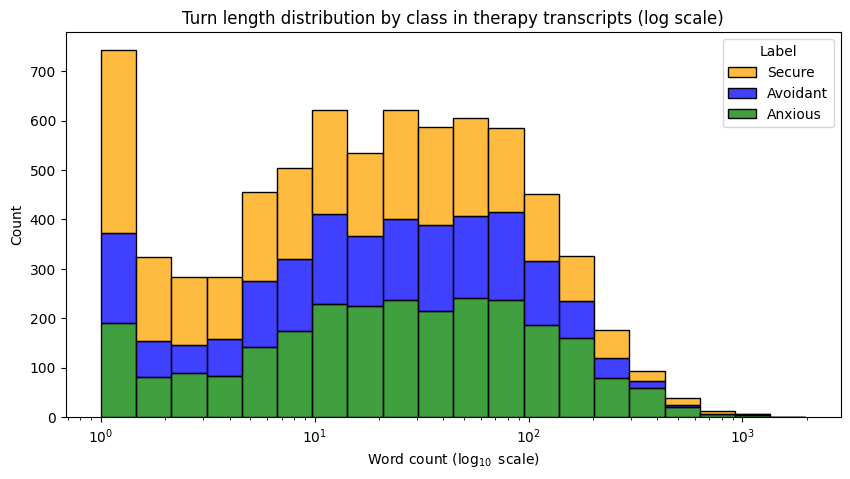

In [70]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Anxious"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)

# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Anxious": 'green'}

plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="stack", legend=True)
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.title("Turn length distribution by class in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/log_stack_turn_length_distribution_by_class.png")
# plt.savefig("/home/unicph.domain/wqs493/ucph/securegroupdir/SAMF-SODAS-PACS/Outputs/Descriptives/turn_length_distribution_by_class.png")
plt.show()

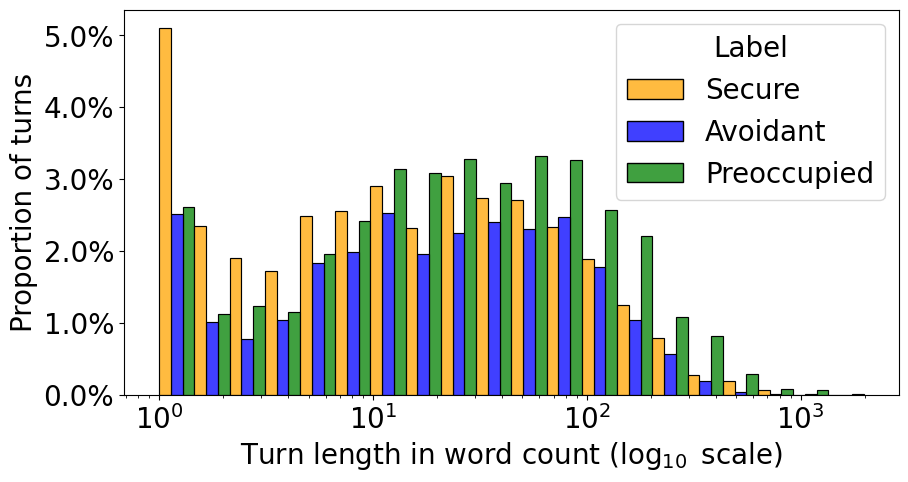

In [20]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Preoccupied"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)


# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Preoccupied": 'green'}

# Calculate weights to normalize the histogram
weights = np.ones_like(full['turn_length']) / len(full['turn_length'])

plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="dodge", legend=True, weights=weights)
plt.xlabel("Turn length in word count ($\log_{10}$ scale)")
plt.ylabel("Proportion of turns")
# plt.title("Turn length distribution by class in therapy transcripts (log scale)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.rcParams.update({'font.size': 20})
# plt.savefig("../TeX/figures/updates/log_dodge_turn_length_distribution_by_class.png")
plt.savefig("../TeX/figures/updates/log_dodge_turn_length_total.png", bbox_inches='tight')
plt.show()

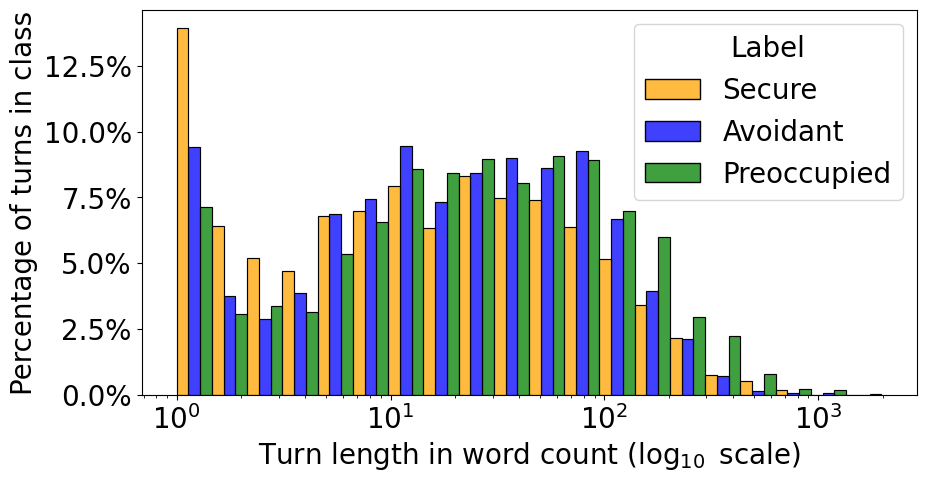

In [19]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Preoccupied"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)

# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Preoccupied": 'green'}

plt.figure(figsize=(10, 5))
plt.xscale("log")

# Calculate weights to normalize the histogram within each class
weights = full.groupby('Label')['turn_length'].transform(lambda x: 1 / len(x))

sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="dodge", legend=True, weights=weights)
plt.xlabel("Turn length in word count ($\log_{10}$ scale)")
plt.ylabel("Percentage of turns in class")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.rcParams.update({'font.size': 20})
plt.savefig("../TeX/figures/updates/log_dodge_turn_length_by_class.png", bbox_inches='tight')
plt.show()

# Error analysis

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
split1_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split1_test_preds.csv", sep="\t")
split2_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split2_test_preds.csv", sep="\t")
split3_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split3_test_preds.csv", sep="\t")
split4_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split4_test_preds.csv", sep="\t")
split5_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split5_test_preds.csv", sep="\t")
targets = pd.read_csv(r"E:\PACS\robertal-large_150\test_combined_150.csv", sep="\t")

In [23]:
split1_preds.drop(columns=["document"], inplace=True)

split2_preds.drop(columns=["document", "text"], inplace=True)
split2_preds.rename(columns={"1": "2"}, inplace=True)

split3_preds.drop(columns=["document", "text"], inplace=True)
split3_preds.rename(columns={"1": "3"}, inplace=True)

split4_preds.drop(columns=["document", "text"], inplace=True)
split4_preds.rename(columns={"1": "4"}, inplace=True)

split5_preds.drop(columns=["document", "text"], inplace=True)
split5_preds.rename(columns={"1": "5"}, inplace=True)

all_preds = pd.concat([split1_preds, split2_preds, split3_preds, split4_preds, split5_preds], axis=1)

In [24]:
results = pd.concat([targets.drop(columns="text"), all_preds], axis=1)

In [25]:
results["vote"] = results.drop(columns=["label"]).mode(axis=1, numeric_only=True)[0]

In [26]:
cm_total = confusion_matrix(results["label"], results["vote"], labels=[1, 2, 3])
cm_total

array([[ 3,  0, 19],
       [ 0,  4,  8],
       [ 2,  0, 53]], dtype=int64)

In [27]:
cm_1 = confusion_matrix(results["label"], results["1"], labels=[1, 2, 3])
cm_2 = confusion_matrix(results["label"], results["2"], labels=[1, 2, 3])
cm_3 = confusion_matrix(results["label"], results["3"], labels=[1, 2, 3])
cm_4 = confusion_matrix(results["label"], results["4"], labels=[1, 2, 3])
cm_5 = confusion_matrix(results["label"], results["5"], labels=[1, 2, 3])

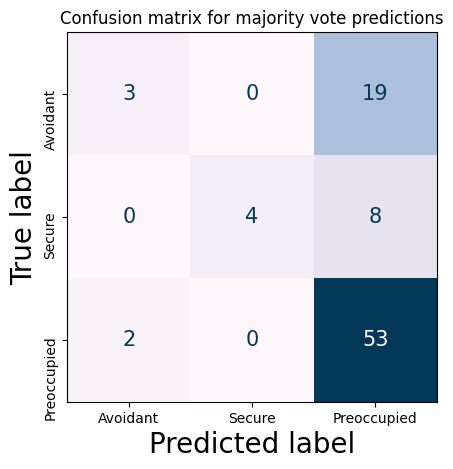

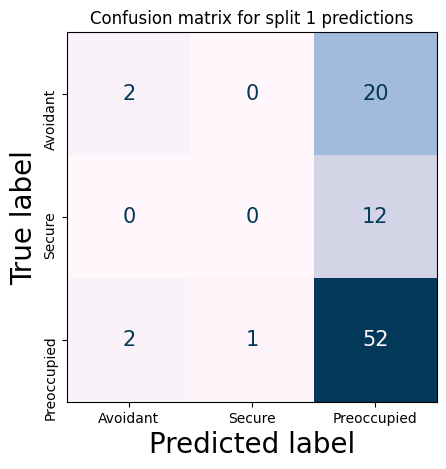

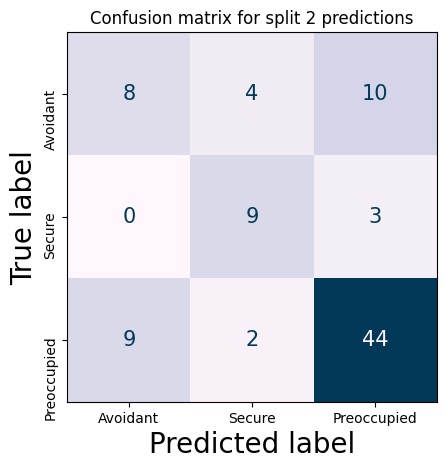

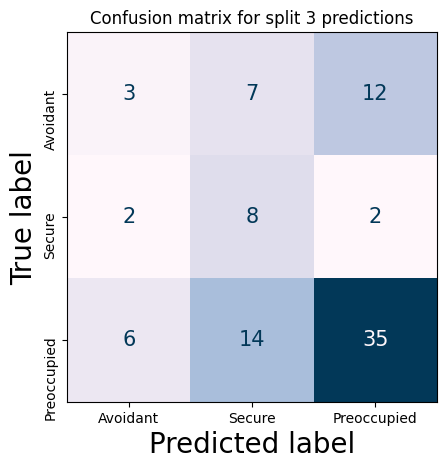

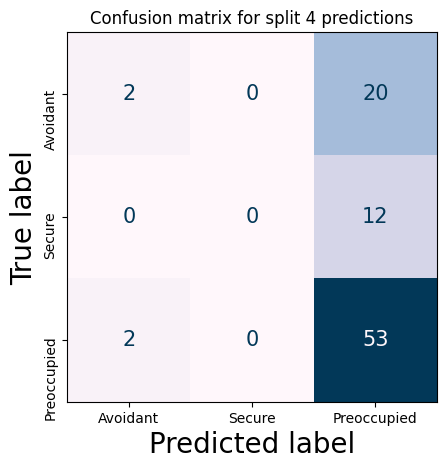

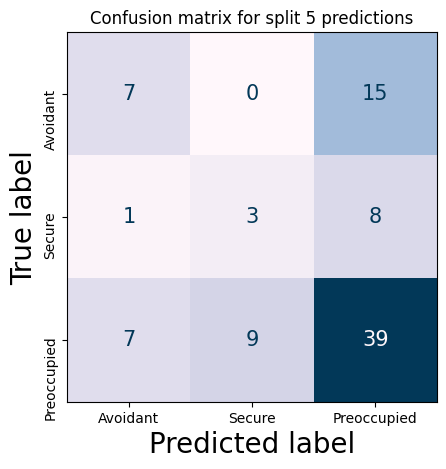

In [28]:
cmap = "PuBu"
# cmap = "binary"
# cmap = "bone_r"
# cmap = "magma_r"
# cmap = "Blues"

ConfusionMatrixDisplay(cm_total, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for majority vote predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_combined_confusion_matrix.png")

ConfusionMatrixDisplay(cm_1, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 1 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split1_confusion_matrix.png")

ConfusionMatrixDisplay(cm_2, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 2 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split2_confusion_matrix.png")

ConfusionMatrixDisplay(cm_3, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 3 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split3_confusion_matrix.png")

ConfusionMatrixDisplay(cm_4, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 4 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split4_confusion_matrix.png")

ConfusionMatrixDisplay(cm_5, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 5 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split5_confusion_matrix.png")

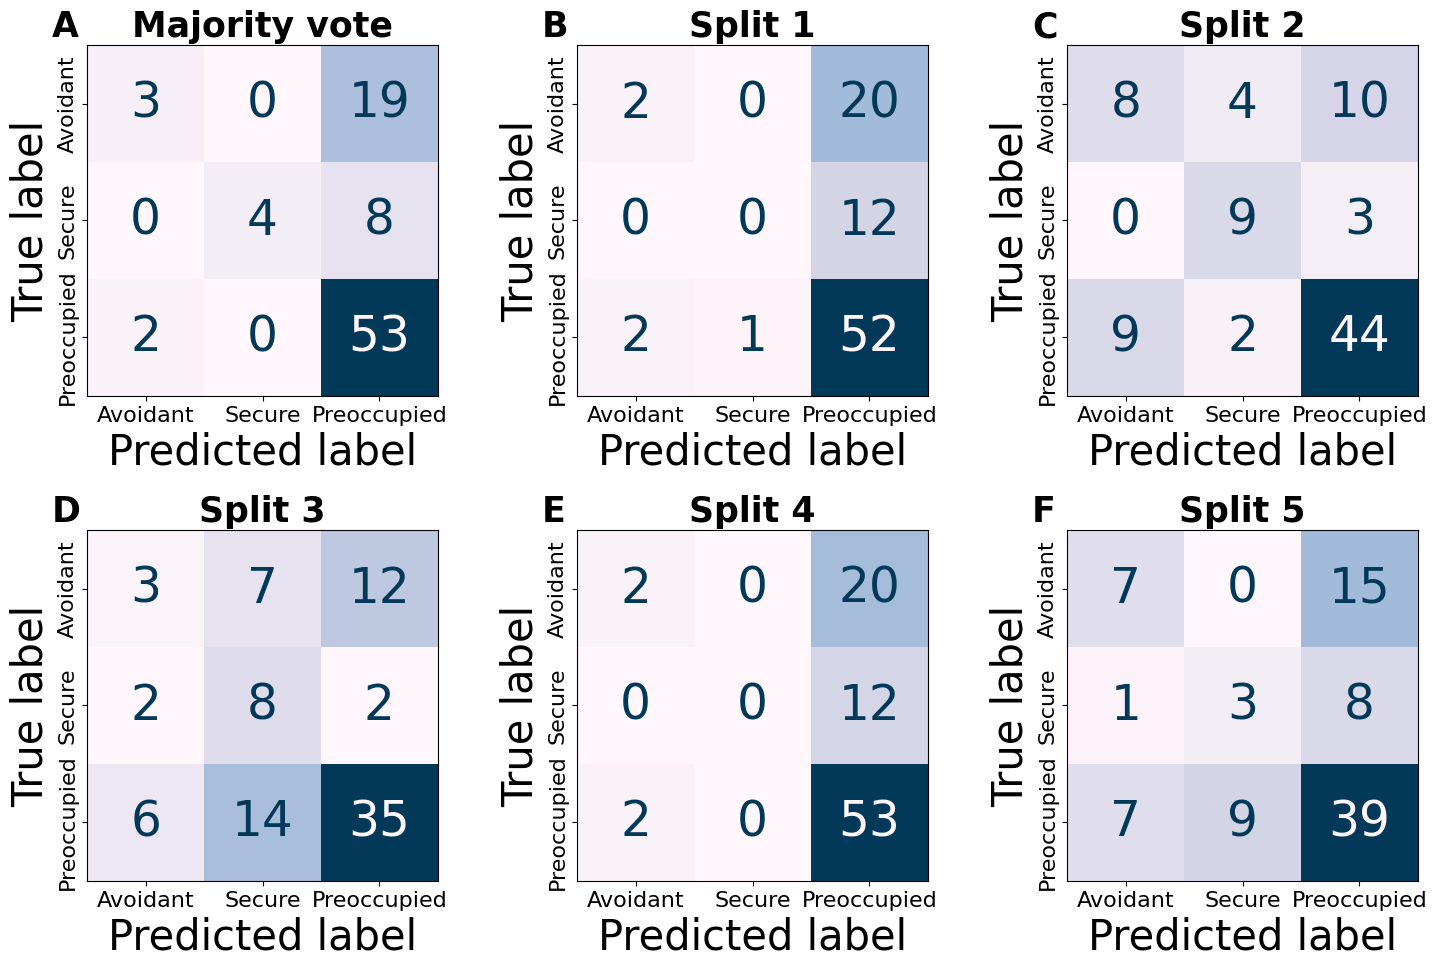

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # create a 2x3 grid of subplots with smaller figure size
title_size = 25
title_weight = 750
text_size = 35
tick_size = 30
label_size = 16
plot_label_size = 25

# Plot the confusion matrices
ConfusionMatrixDisplay(cm_total, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[0, 0], text_kw={"size": text_size}, colorbar=False)
axs[0, 0].set_title("Majority vote", fontsize=title_size, fontweight=title_weight)

ConfusionMatrixDisplay(cm_1, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[0, 1], text_kw={"size": text_size}, colorbar=False)
axs[0, 1].set_title("Split 1", fontsize=title_size, fontweight=title_weight)

ConfusionMatrixDisplay(cm_2, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[0, 2], text_kw={"size": text_size}, colorbar=False)
axs[0, 2].set_title("Split 2", fontsize=title_size, fontweight=title_weight)

ConfusionMatrixDisplay(cm_3, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[1, 0], text_kw={"size": text_size}, colorbar=False)
axs[1, 0].set_title("Split 3", fontsize=title_size, fontweight=title_weight)

ConfusionMatrixDisplay(cm_4, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[1, 1], text_kw={"size": text_size}, colorbar=False)
axs[1, 1].set_title("Split 4", fontsize=title_size, fontweight=title_weight)

ConfusionMatrixDisplay(cm_5, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[1, 2], text_kw={"size": text_size}, colorbar=False)
axs[1, 2].set_title("Split 5", fontsize=title_size, fontweight=title_weight)

# Rotate the y-axis labels
for ax in axs.flat:
    labels = ax.get_yticklabels()
    ax.set_yticklabels(labels, rotation=90, va='center')
    ax.tick_params(axis='both', which='major', labelsize=label_size)  # Change tick label font size
    ax.xaxis.label.set_size(tick_size)  # Change x-axis label font size
    ax.yaxis.label.set_size(tick_size)  # Change y-axis label font size
        
# Label the subplots
labels = ['A', 'B', 'C', 'D', 'E', 'F']
for ax, label in zip(axs.flat, labels):
    ax.text(-0.1, 1.1, label, transform=ax.transAxes, fontsize=plot_label_size, fontweight='bold', va='top')

# Adjust the layout
plt.tight_layout()
# fig.colorbar(axs[0, 0].get_images()[0], ax=axs, orientation='vertical', fraction=.1, pad=0.05, aspect=80)

# # Save the figure
plt.savefig("../TeX/figures/updates/combined_confusion_matrix.png")
plt.show()

In [14]:
total_precision = np.diag(cm_total) / np.sum(cm_total, axis=0)
total_recall = np.diag(cm_total) / np.sum(cm_total, axis=1)
total_f1 = 2 * total_precision * total_recall / (total_precision + total_recall)

print(f"Total precision: {total_precision}")
print(f"Total recall: {total_recall}")
print(f"Total F1: {total_f1}")

Total precision: [0.6    1.     0.6625]
Total recall: [0.13636364 0.33333333 0.96363636]
Total F1: [0.22222222 0.5        0.78518519]


In [42]:
acc = accuracy_score(results["label"], results["vote"])
prec = precision_score(results["label"], results["vote"], average="macro")
rec = recall_score(results["label"], results["vote"], average="macro")
f1_micro = f1_score(results["label"], results["vote"], average="micro")
f1_macro = f1_score(results["label"], results["vote"], average="macro")
f1_weighted = f1_score(results["label"], results["vote"], average="weighted")

In [43]:
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 micro: {f1_micro}")
print(f"F1 macro: {f1_macro}")
print(f"F1 weighted: {f1_weighted}")

Accuracy: 0.6741573033707865
Precision: 0.7541666666666668
Recall: 0.4777777777777778
F1 micro: 0.6741573033707865
F1 macro: 0.5024691358024692
F1 weighted: 0.6075738660008323


In [59]:
# Split 1
# precision_1 = np.diag(cm_1) / np.sum(cm_1, axis=0)
micro_precision_1 = precision_score(results["label"], results["1"], average="micro")
macro_precision_1 = precision_score(results["label"], results["1"], average="macro")

# recall_1 = np.diag(cm_1) / np.sum(cm_1, axis=1)
micro_recall_1 = recall_score(results["label"], results["1"], average="micro")
macro_recall_1 = recall_score(results["label"], results["1"], average="macro")

# f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)
micro_f1_1 = f1_score(results["label"], results["1"], average="micro")
macro_f1_1 = f1_score(results["label"], results["1"], average="macro")

# print(f"Precision 1: {precision_1}")
print(f"Micro precision 1: {round(micro_precision_1*100, 2)}")
print(f"Macro precision 1: {round(macro_precision_1*100, 2)}")
print("\n")

# print(f"Recall 1: {recall_1}")
print(f"Micro recall 1: {round(micro_recall_1*100, 2)}")
print(f"Macro recall 1: {round(macro_recall_1*100, 2)}")
print("\n")

# print(f"F1 1: {f1_1}")
print(f"Micro F1 1: {round(micro_f1_1*100, 2)}")
print(f"Macro F1 1: {round(macro_f1_1*100, 2)}")

Micro precision 1: 60.67
Macro precision 1: 37.3


Micro recall 1: 60.67
Macro recall 1: 34.55


Micro F1 1: 60.67
Macro F1 1: 30.07


In [60]:
# Split 2
micro_precision_2 = precision_score(results["label"], results["2"], average="micro")
macro_precision_2 = precision_score(results["label"], results["2"], average="macro")

micro_recall_2 = recall_score(results["label"], results["2"], average="micro")
macro_recall_2 = recall_score(results["label"], results["2"], average="macro")

micro_f1_2 = f1_score(results["label"], results["2"], average="micro")
macro_f1_2 = f1_score(results["label"], results["2"], average="macro")

print(f"Micro precision 2: {round(micro_precision_2*100, 2)}")
print(f"Macro precision 2: {round(macro_precision_2*100, 2)}")
print("\n")

print(f"Micro recall 2: {round(micro_recall_2*100, 2)}")
print(f"Macro recall 2: {round(macro_recall_2*100, 2)}")
print("\n")

print(f"Micro F1 2: {round(micro_f1_2*100, 2)}")
print(f"Macro F1 2: {round(macro_f1_2*100, 2)}")

Micro precision 2: 68.54
Macro precision 2: 61.42


Micro recall 2: 68.54
Macro recall 2: 63.79


Micro F1 2: 68.54
Macro F1 2: 62.09


In [61]:
# Split 3
micro_precision_3 = precision_score(results["label"], results["3"], average="micro")
macro_precision_3 = precision_score(results["label"], results["3"], average="macro")

micro_recall_3 = recall_score(results["label"], results["3"], average="micro")
macro_recall_3 = recall_score(results["label"], results["3"], average="macro")

micro_f1_3 = f1_score(results["label"], results["3"], average="micro")
macro_f1_3 = f1_score(results["label"], results["3"], average="macro")

print(f"Micro precision 3: {round(micro_precision_3*100, 2)}")
print(f"Macro precision 3: {round(macro_precision_3*100, 2)}")
print("\n")

print(f"Micro recall 3: {round(micro_recall_3*100, 2)}")
print(f"Macro recall 3: {round(macro_recall_3*100, 2)}")
print("\n")

print(f"Micro F1 3: {round(micro_f1_3*100, 2)}")
print(f"Macro F1 3: {round(macro_f1_3*100, 2)}")

Micro precision 3: 51.69
Macro precision 3: 42.1


Micro recall 3: 51.69
Macro recall 3: 47.98


Micro F1 3: 51.69
Macro F1 3: 41.5


In [62]:
# Split 4
micro_precision_4 = precision_score(results["label"], results["4"], average="micro")
macro_precision_4 = precision_score(results["label"], results["4"], average="macro")

micro_recall_4 = recall_score(results["label"], results["4"], average="micro")
macro_recall_4 = recall_score(results["label"], results["4"], average="macro")

micro_f1_4 = f1_score(results["label"], results["4"], average="micro")
macro_f1_4 = f1_score(results["label"], results["4"], average="macro")

print(f"Micro precision 4: {round(micro_precision_4*100, 2)}")
print(f"Macro precision 4: {round(macro_precision_4*100, 2)}")
print("\n")

print(f"Micro recall 4: {round(micro_recall_4*100, 2)}")
print(f"Macro recall 4: {round(macro_recall_4*100, 2)}")
print("\n")

print(f"Micro F1 4: {round(micro_f1_4*100, 2)}")
print(f"Macro F1 4: {round(macro_f1_4*100, 2)}")


Micro precision 4: 61.8
Macro precision 4: 37.45


Micro recall 4: 61.8
Macro recall 4: 35.15


Micro F1 4: 61.8
Macro F1 4: 30.37


c:\Users\frbre\OneDrive\01 Dokumenter\01 Uni\SDS Thesis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Split 5
micro_precision_5 = precision_score(results["label"], results["5"], average="micro")
macro_precision_5 = precision_score(results["label"], results["5"], average="macro")

micro_recall_5 = recall_score(results["label"], results["5"], average="micro")
macro_recall_5 = recall_score(results["label"], results["5"], average="macro")

micro_f1_5 = f1_score(results["label"], results["5"], average="micro")
macro_f1_5 = f1_score(results["label"], results["5"], average="macro")

print(f"Micro precision 5: {round(micro_precision_5*100, 2)}")
print(f"Macro precision 5: {round(macro_precision_5*100, 2)}")
print("\n")

print(f"Micro recall 5: {round(micro_recall_5*100, 2)}")
print(f"Macro recall 5: {round(macro_recall_5*100, 2)}")
print("\n")

print(f"Micro F1 5: {round(micro_f1_5*100, 2)}")
print(f"Macro F1 5: {round(macro_f1_5*100, 2)}")

Micro precision 5: 55.06
Macro precision 5: 44.86


Micro recall 5: 55.06
Macro recall 5: 42.58


Micro F1 5: 55.06
Macro F1 5: 43.17


# Validation results table

In [122]:
import statistics

accs = [35.82, 59.68, 52.52, 48.61, 49.15]

mean_accs = statistics.mean(accs)
std_dev_accs = statistics.stdev(accs)

print(f"Mean: {round(mean_accs, 2)}")
print(f"Standard Deviation: {round(std_dev_accs, 2)}")

Mean: 49.16
Standard Deviation: 8.66


In [49]:
val_results = pd.read_excel("../notebooks/val_results.xlsx")

In [51]:
val_results.ffill(inplace=True)

In [53]:
val_results.rename(columns={"avg_val_acc": "Average validation set accuracy", "val_std": "Standard deviation"}, inplace=True)

In [140]:
# val_results.set_index(['Encoder', val_results.index], inplace=True)

In [141]:
val_results.to_latex("../TeX/figures/val_results.tex", index=False)

In [54]:
def format_mean_std(row):
    return f"{row['Average validation set accuracy']} ({row['Standard deviation']})"

val_results['Average validation set accuracy'] = val_results.apply(format_mean_std, axis=1)

In [56]:
val_results.drop(columns="Standard deviation", inplace=True)

In [58]:
val_results.rename(columns={"Average validation set accuracy": "Average validation set accuracy (SD)"}, inplace=True)

In [60]:
val_results.to_latex("../TeX/figures/val_results_APA.tex", index=False)

# Orthogonal scales visualisation

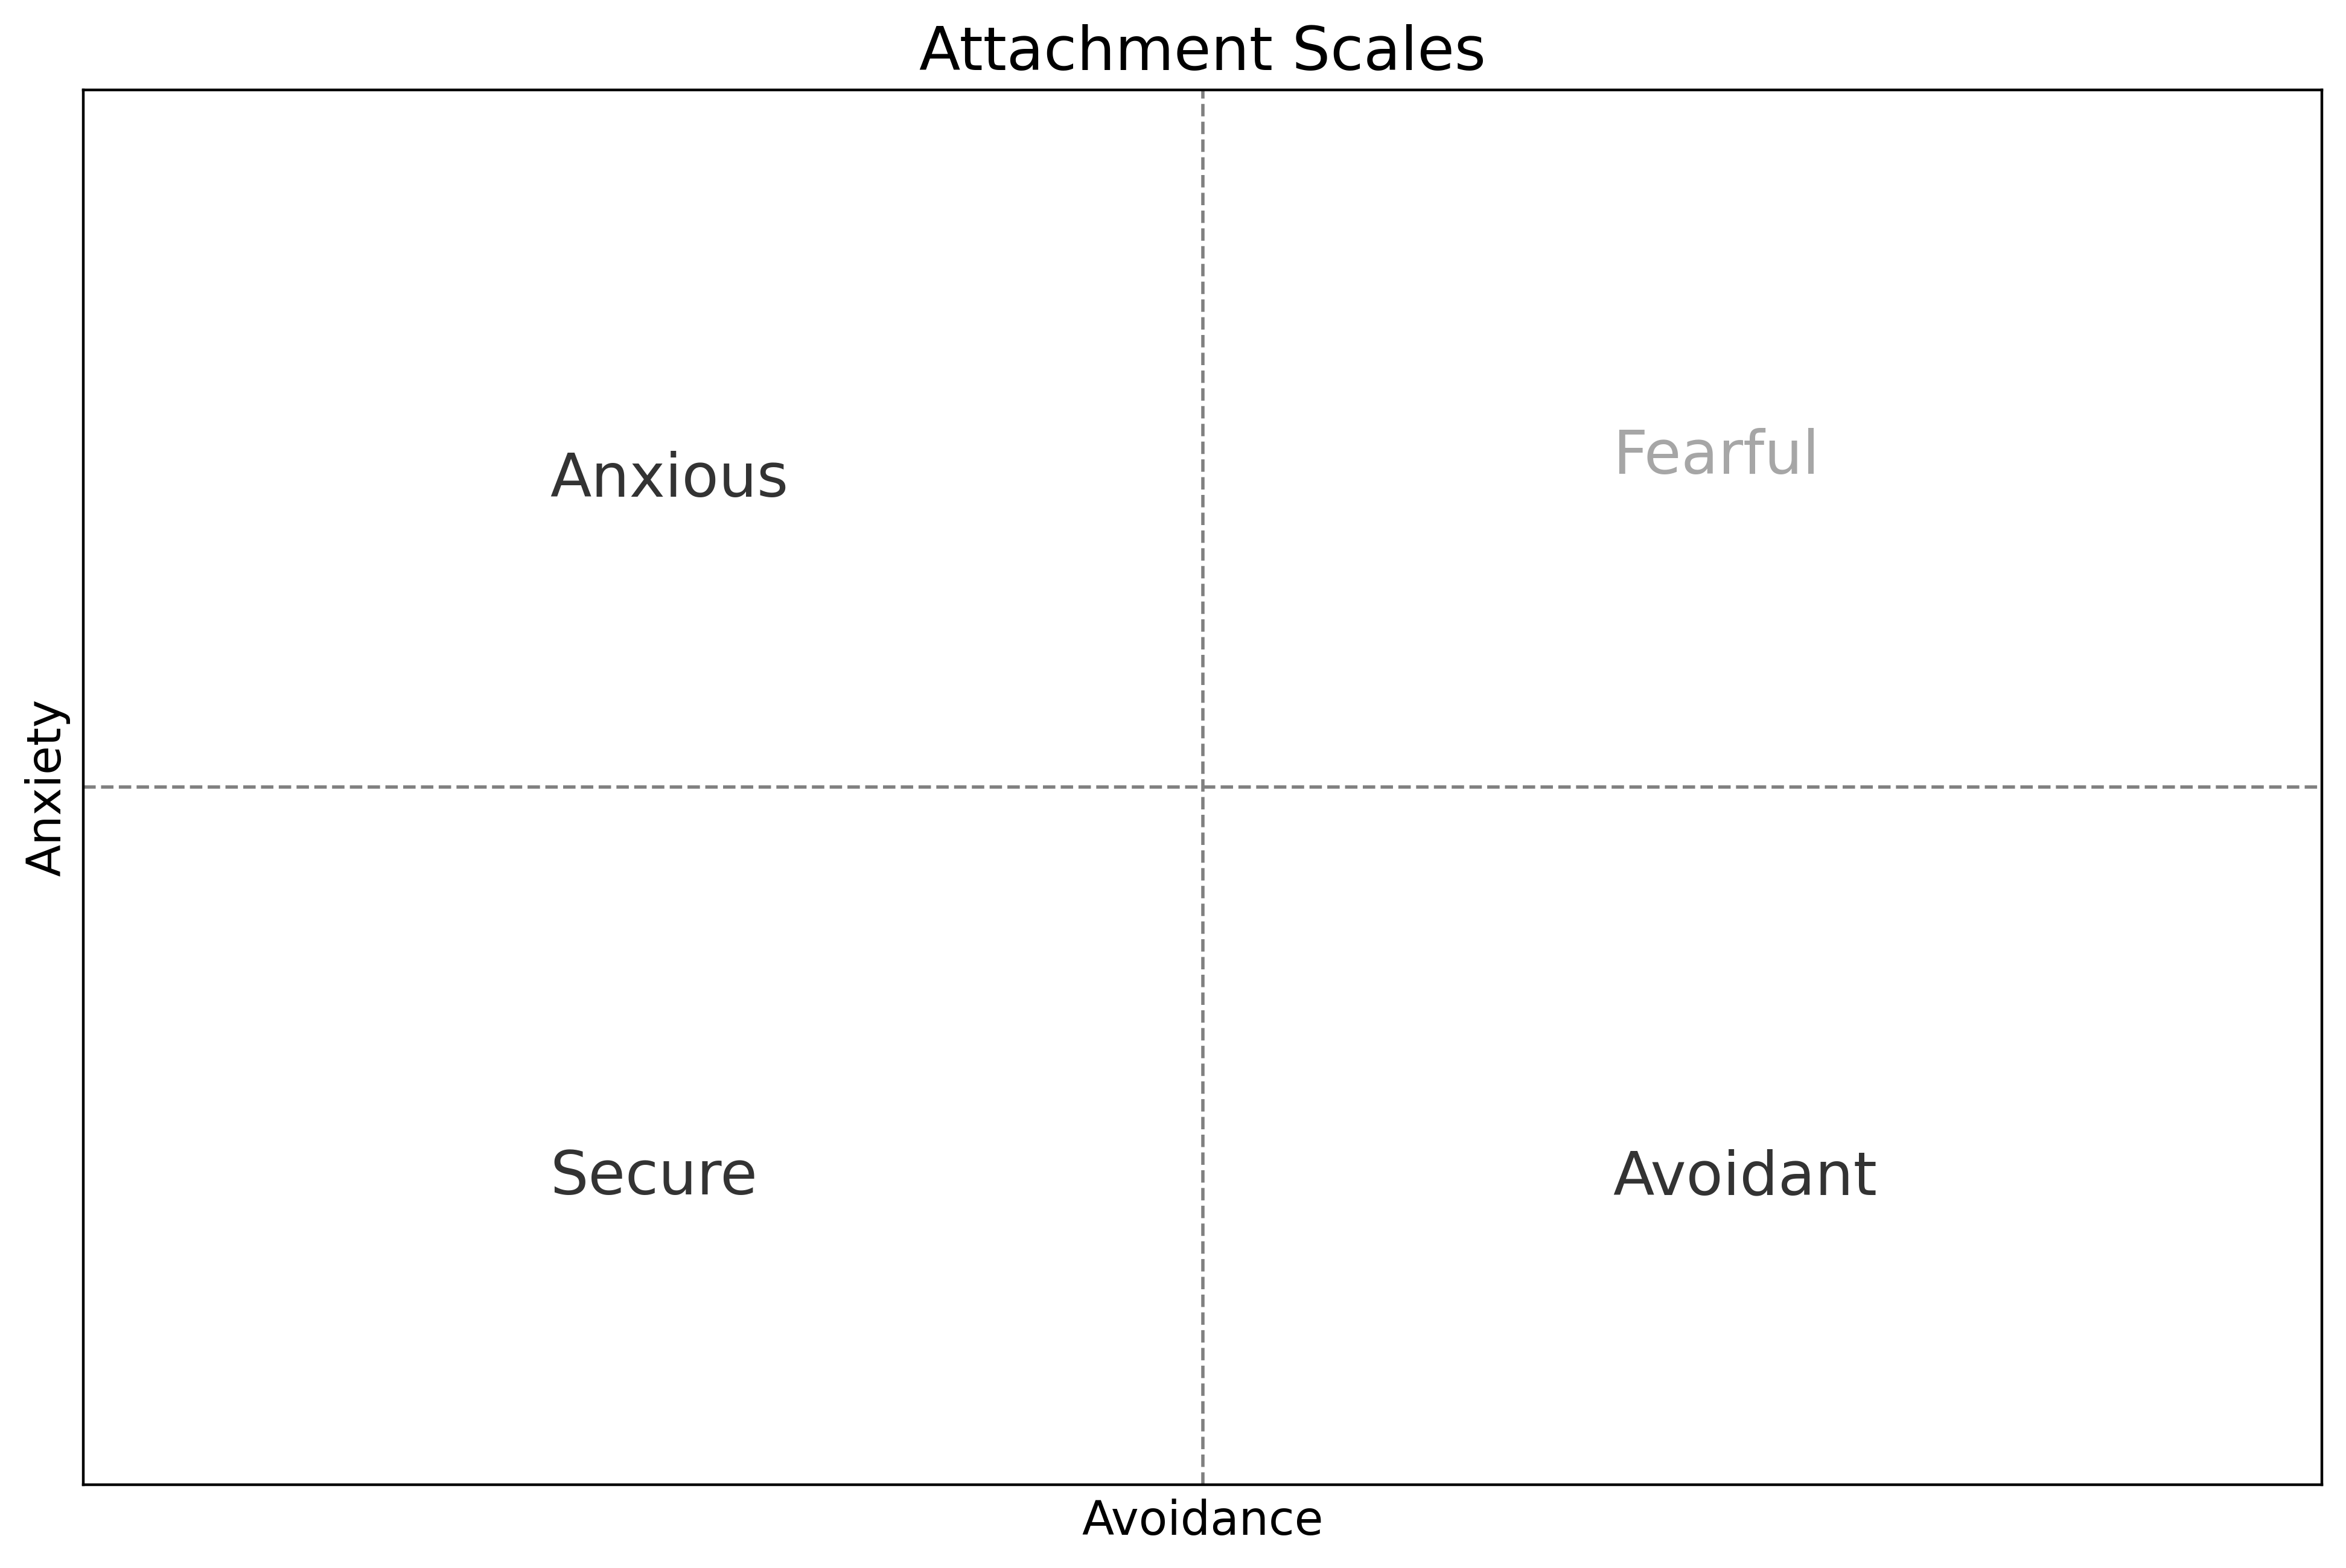

In [167]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=400)
fig.tight_layout()
fig.subplots_adjust(top=0.88)  # adjust the top padding
# fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# labels
plt.title("Attachment Scales", fontsize=18)
plt.xlabel("Avoidance", fontsize=14)
plt.ylabel("Anxiety", fontsize=14)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

# lines
ax.axhline(3, color="gray", linewidth=1, ls="--") # add horizontal line
ax.axvline(3, color="gray", linewidth=1, ls="--") # add vertical line

# text
plt.text(1.25, 1.25, "Secure", fontsize=18, color="black", alpha=0.8)
plt.text(4.1, 1.25, "Avoidant", fontsize=18, color="black", alpha=0.8)
plt.text(1.25, 4.25, "Anxious", fontsize=18, color="black", alpha=0.8)
plt.text(4.1, 4.35, "Fearful", fontsize=18, color="black", alpha=0.35)

# Set axis limits
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

fig.set_facecolor("white") # set background colour to white to make labels and title visible in dark mode

plt.savefig("../TeX/figures/attachment_scales.png")
plt.show()

# Class balance check

In [28]:
import pandas as pd
from utils.preprocessing.transcript import load_data_with_labels, combine_turns

In [31]:
train_path = r"D:\PACS\train_PACS.csv"
train_data = pd.read_csv(train_path, sep="\t")

In [32]:
combined_train = combine_turns(train_data, 150)

In [35]:
combined_train['label'].value_counts(normalize=True)

label
3    0.476744
2    0.316279
1    0.206977
Name: proportion, dtype: float64

In [36]:
test_path = r"D:\PACS\test_PACS.csv"
test_data = pd.read_csv(test_path, sep="\t")

In [37]:
combined_test = combine_turns(test_data, 150)

In [38]:
combined_test['label'].value_counts(normalize=True)

label
3    0.617978
1    0.247191
2    0.134831
Name: proportion, dtype: float64

# Cohens kappa

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
split1_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split1_test_preds.csv", sep="\t")
split2_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split2_test_preds.csv", sep="\t")
split3_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split3_test_preds.csv", sep="\t")
split4_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split4_test_preds.csv", sep="\t")
split5_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split5_test_preds.csv", sep="\t")
targets = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\test_combined_150.csv", sep="\t")

split1_preds.drop(columns=["document"], inplace=True)

split2_preds.drop(columns=["document", "text"], inplace=True)
split2_preds.rename(columns={"1": "2"}, inplace=True)

split3_preds.drop(columns=["document", "text"], inplace=True)
split3_preds.rename(columns={"1": "3"}, inplace=True)

split4_preds.drop(columns=["document", "text"], inplace=True)
split4_preds.rename(columns={"1": "4"}, inplace=True)

split5_preds.drop(columns=["document", "text"], inplace=True)
split5_preds.rename(columns={"1": "5"}, inplace=True)

all_preds = pd.concat([split1_preds, split2_preds, split3_preds, split4_preds, split5_preds], axis=1)

results = pd.concat([targets.drop(columns="text"), all_preds], axis=1)

results["vote"] = results.drop(columns=["label"]).mode(axis=1, numeric_only=True)[0]

In [7]:
results.isna().sum()

label       0
document    0
text        0
1           0
2           0
3           0
4           0
5           0
vote        0
dtype: int64

In [8]:
cm_total = confusion_matrix(results["label"], results["vote"], labels=[1, 2, 3])
cm_total

array([[ 3,  0, 19],
       [ 0,  4,  8],
       [ 2,  0, 53]], dtype=int64)

In [9]:
cm_1 = confusion_matrix(results["label"], results["1"], labels=[1, 2, 3])
cm_2 = confusion_matrix(results["label"], results["2"], labels=[1, 2, 3])
cm_3 = confusion_matrix(results["label"], results["3"], labels=[1, 2, 3])
cm_4 = confusion_matrix(results["label"], results["4"], labels=[1, 2, 3])
cm_5 = confusion_matrix(results["label"], results["5"], labels=[1, 2, 3])

In [12]:
k1 = cohen_kappa_score(results["label"], results["1"]).round(2)
k2 = cohen_kappa_score(results["label"], results["2"]).round(2)
k3 = cohen_kappa_score(results["label"], results["3"]).round(2)
k4 = cohen_kappa_score(results["label"], results["4"]).round(2)
k5 = cohen_kappa_score(results["label"], results["5"]).round(2)
k_total = cohen_kappa_score(results["label"], results["vote"]).round(2)

print(f"Kappa 1: {k1}")
print(f"Kappa 2: {k2}")
print(f"Kappa 3: {k3}")
print(f"Kappa 4: {k4}")
print(f"Kappa 5: {k5}")
print(f"Kappa total: {k_total}")

Kappa 1: 0.03
Kappa 2: 0.41
Kappa 3: 0.17
Kappa 4: 0.04
Kappa 5: 0.12
Kappa total: 0.23


In [13]:
np.mean([k1, k2, k3, k4, k5])

0.154

# Accuracy over length plotting

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score

In [3]:
targets = pd.read_csv(r"E:/PACS/PACS_val_old.csv", sep="\t")
preds = pd.read_csv(r"E:/PACS/0314_preds.csv", sep="\t")

In [4]:
preds

,text,2
0,"I’m ok. I’m feeling a little, ah, stressed be...",2
1,"um, yeah, I, uh, my personal statement is li...",3
2,just by giving me constructive criticism and...,3
3,"(kind of laughing) yeah, but not that one, ca...",1
4,"um, but then there’s preparing all those mono...",1
...,...,...
1025,yeah - - it’s also more practical right now -...,2
1026,yeah - - I think that’s like - - my practice ...,3
1027,well - um - actually - this last week I reall...,3
1028,ok,1


In [5]:
true_labels = targets["label"].to_list()
pred_labels = preds.iloc[:, -1].to_list()

In [6]:
min_length = 0

In [7]:
# Add a new column to the dataframes representing the length of the instances
preds['length'] = preds.iloc[:, 0].apply(lambda x: len(x.split()))
targets['length'] = targets.iloc[:, 0].apply(lambda x: len(x.split()))

# Define a function to categorize the lengths into bins
def bin_length(length):
    if min_length == 100:
        if length <= 150:
            return '100-150'
        elif length <= 200:
            return '151-200'
        elif length <= 300:
            return '201-300'
        elif length <= 400:
            return '301-400'
        elif length <= 500:
            return '401-500'
        elif length <= 750:
            return '501-750'
        else:
            return '751+'
    elif min_length == 50:
        if length <= 100:
            return '50-100'
        elif length <= 150:
            return '101-150'
        elif length <= 200:
            return '151-200'
        elif length <= 300:
            return '201-300'
        elif length <= 400:
            return '301-400'
        elif length <= 500:
            return '401-500'
        elif length <= 750:
            return '501-750'
        else:
            return '751+'
    else:
        if length <= 5:
            return '0-5'
        elif length <= 50:
            return '6-50'
        elif length <= 100:
            return '51-100'
        elif length <= 150:
            return '101-150'
        elif length <= 200:
            return '151-200'
        elif length <= 300:
            return '201-300'
        elif length <= 400:
            return '301-400'
        elif length <= 500:
            return '401-500'
        # elif length <= 750:
        #     return '501-750'
        # else:
        #     return '751+'
        else:
            return '501+'

In [8]:
# Apply the function to the 'length' column to create a new 'bin' column
preds['bin'] = preds['length'].apply(bin_length)
targets['bin'] = targets['length'].apply(bin_length)

# Group the data by 'bin'
grouped_preds = preds.groupby('bin')
grouped_targets = targets.groupby('bin')

# Define a function to sort the bins
def sort_bins(bin):
    if bin == '751+':
        return 10000  # Return a large number for '751+' so it is sorted last
    return int(bin.split('-')[1]) if '-' in bin else int(bin.split('+')[0])

# Initialize lists to store the metrics for each bin
bins = []
accuracies = []
recalls = []
precisions = []
f1s = []


In [9]:
# Compute the metrics for each bin and also count the class distribution
# class_counts = []
for bin in sorted(grouped_preds.groups.keys(), key=sort_bins):
    pred_labels = grouped_preds.get_group(bin).iloc[:, 1].tolist()
    true_labels = grouped_targets.get_group(bin).iloc[:, 1].tolist()
    
    accuracy = accuracy_score(true_labels, pred_labels)
    recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
    precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)
        
    # # Count the class distribution
    # class_count = np.bincount(true_labels)
    # class_counts.append(class_count)
    
    bins.append(bin)
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1s.append(f1)

C:\Users\frbre\AppData\Local\Temp\ipykernel_2944\3982444308.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(bins, rotation=45, ha='center')


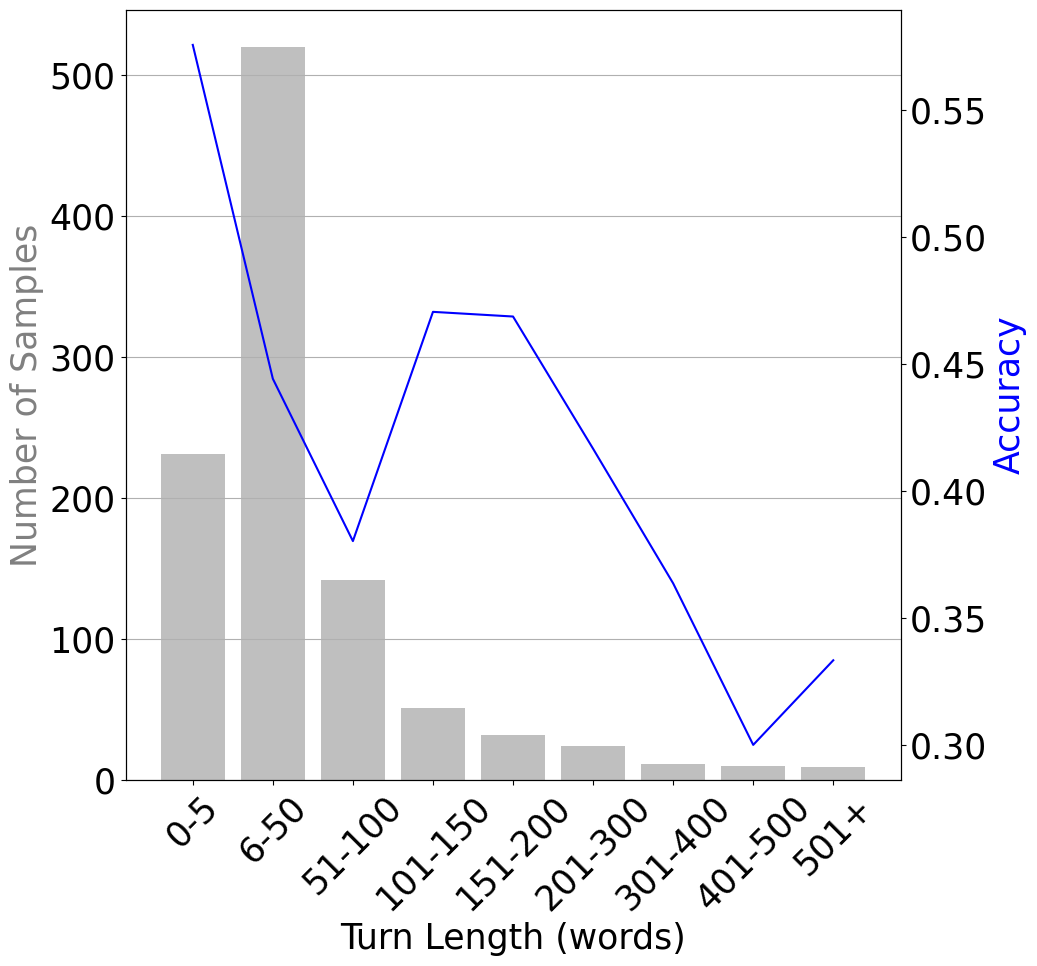

In [14]:
# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 10))

# Plot histogram
counts = [len(grouped_preds.get_group(bin)) for bin in bins]
ax1.bar(bins, counts, color='gray', alpha=0.5, label='Number of Samples')

# Plot the line graph
ax2 = ax1.twinx()
ax2.plot(bins, accuracies, label='Accuracy', color='b')

# Set labels and title
ax1.set_xlabel('Turn Length (words)')
ax1.set_ylabel('Number of Samples', color='gray')
ax2.set_ylabel('Accuracy', color='b')

# Rotate the tick labels on the x-axis
ax1.set_xticklabels(bins, rotation=45, ha='center')
# plt.grid(axis='y')
ax1.grid(axis='y')

matplotlib.rcParams.update({'font.size': 25})
# fig.tight_layout()
plt.savefig("../TeX/figures/updates/turn_length_accuracy_lengrid.png", bbox_inches='tight')

# TODO: change to percentage
# TODO: Combine last 2 or 3 bins